# Customer Churn Dataset

## Import Library

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,cohen_kappa_score,f1_score,log_loss,recall_score,precision_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
from xgboost import XGBClassifier

### About Dataset
This Global Customer Churn Dataset is meticulously curated to aid in understanding and predicting customer churn Behaviour across various industries. With detailed customer profiles, including demographics, product interactions, and banking behaviors, this dataset is an invaluable resource for developing machine learning models aimed at identifying at-risk customers and devising targeted retention strategies."

### Data Description:
Break down the dataset in detail, describing what each column represents:

RowNumber: A unique identifier for each row in the dataset.

CustomerId: Unique customer identification number.

Surname: The last name of the customer (for privacy reasons, consider anonymizing this data if not already done).

CreditScore: The customer's credit score at the time of data collection.

Geography: The customer's country or region, providing insights into location-based trends in churn.

Gender: The customer's gender.

Age: The customer's age, valuable for demographic analysis.

Tenure: The number of years the customer has been with the bank.

Balance: The customer's account balance.

NumOfProducts: The number of products the customer has purchased or subscribed to.

HasCrCard: Indicates whether the customer has a credit card (1) or not (0).

IsActiveMember: Indicates whether the customer is an active member (1) or not (0).

EstimatedSalary: The customer's estimated salary.

Exited: The target variable, indicating whether the customer has churned (1) or not (0).

This dataset is primed for exploratory data analysis, customer segmentation, predictive modeling to churn behaviour,
and the development of customer retention strategies. It offers rich insights for business strategists, data scientists, and researchers interested in improving customer loyalty and reducing churn rates.

### Load the Dataset

#### Descriptive Analysis

In [4]:
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.describe().T # Description of numeric columns

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
data.describe(include=object).T  # Description of category columns

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [8]:
data.info() # No missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Univariate and Bivariate Analysis

#### Univariate Analysis 

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

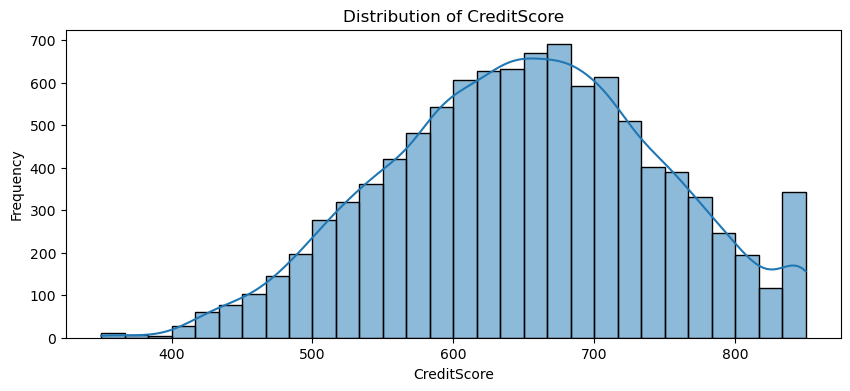

Skewness of CreditScore: -0.07159586676212397
Kurtosis of CreditScore: -0.42611279176518124


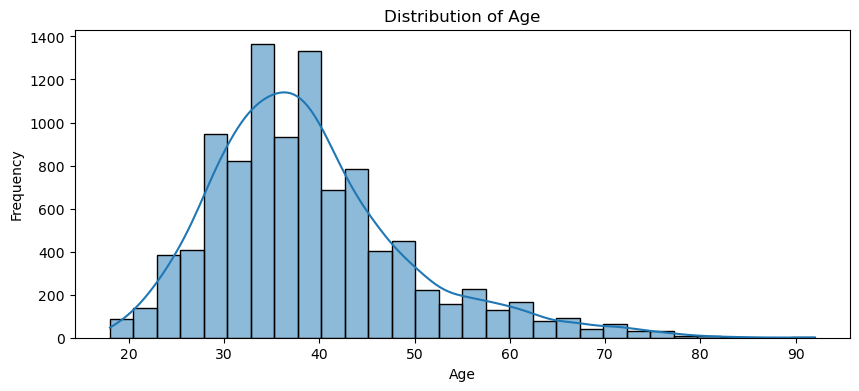

Skewness of Age: 1.0111685586628079
Kurtosis of Age: 1.3940495456392599


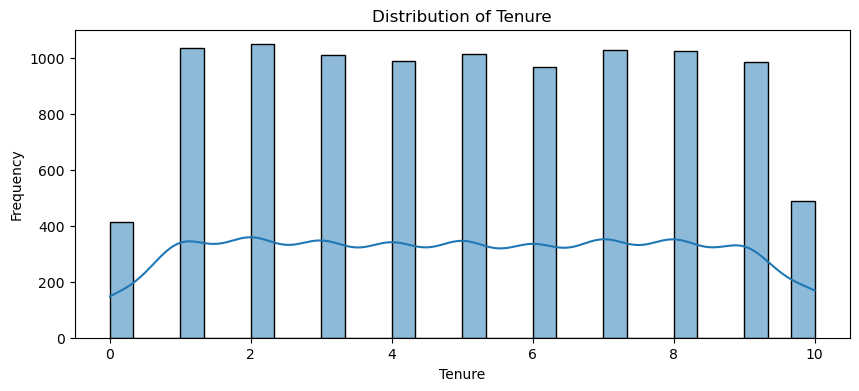

Skewness of Tenure: 0.010989809189781041
Kurtosis of Tenure: -1.1652426364413717


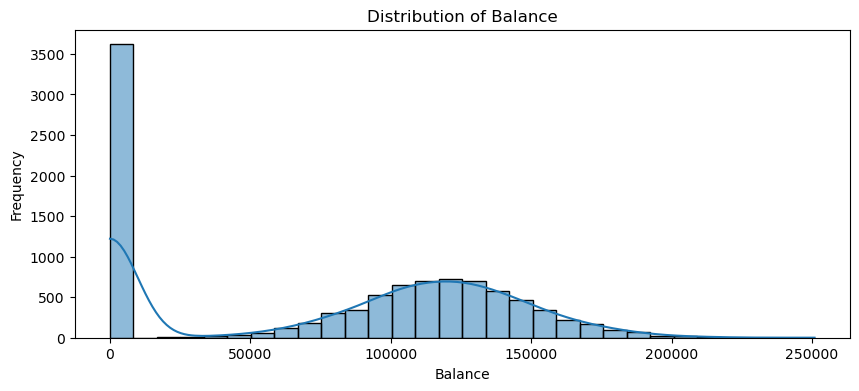

Skewness of Balance: -0.14108754375291138
Kurtosis of Balance: -1.489267106315331


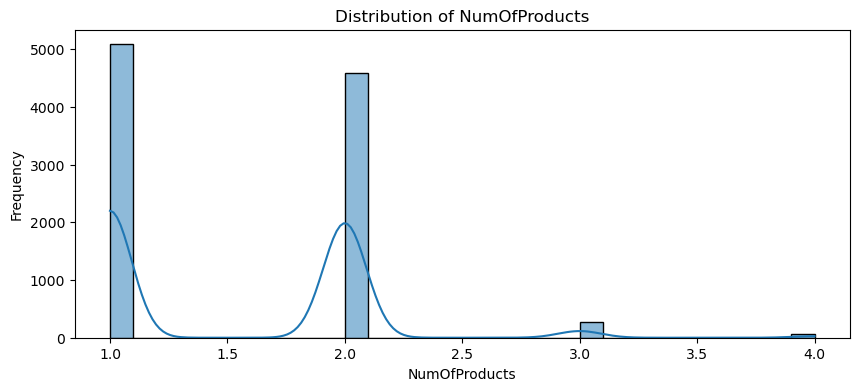

Skewness of NumOfProducts: 0.745456048438949
Kurtosis of NumOfProducts: 0.5820893733639854


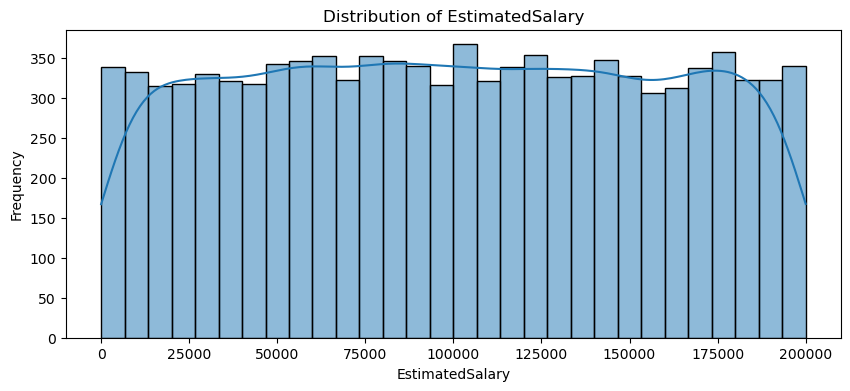

Skewness of EstimatedSalary: 0.0020850448448748848
Kurtosis of EstimatedSalary: -1.181527710874237


In [9]:
# Univariate analysis for numerical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    print(f'Skewness of {column}: {skew(data[column])}')
    print(f'Kurtosis of {column}: {kurtosis(data[column])}')

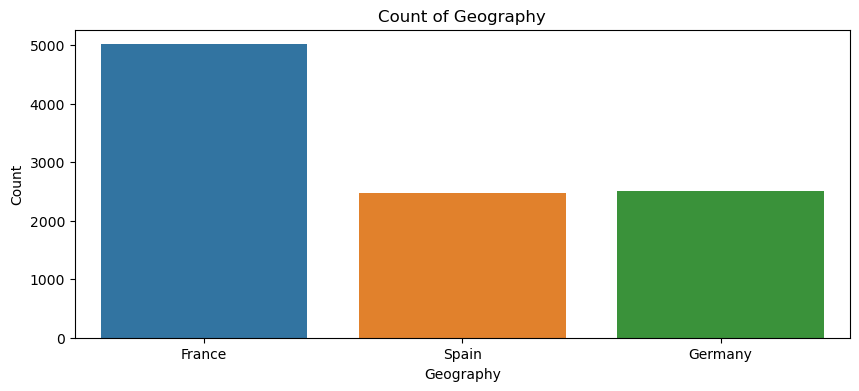

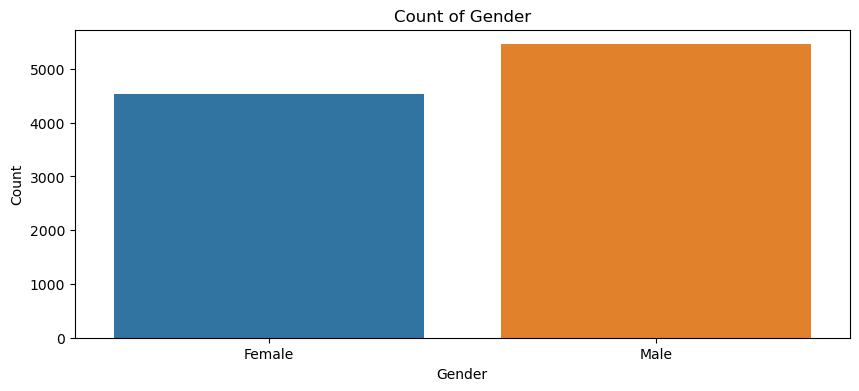

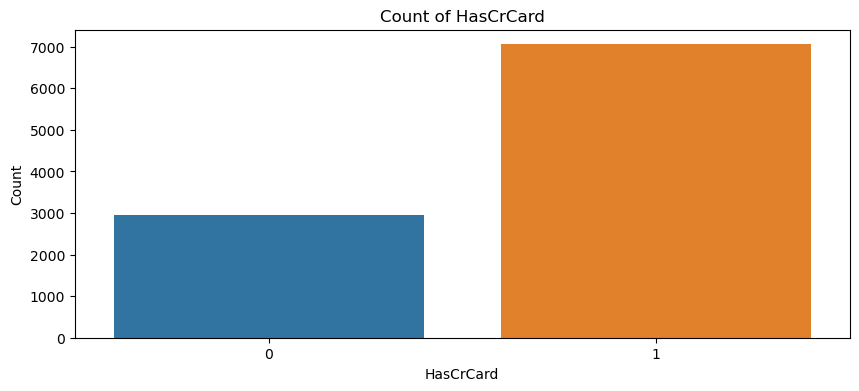

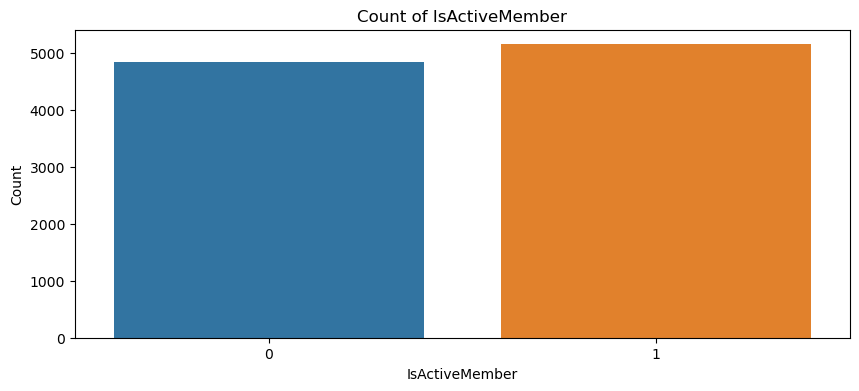

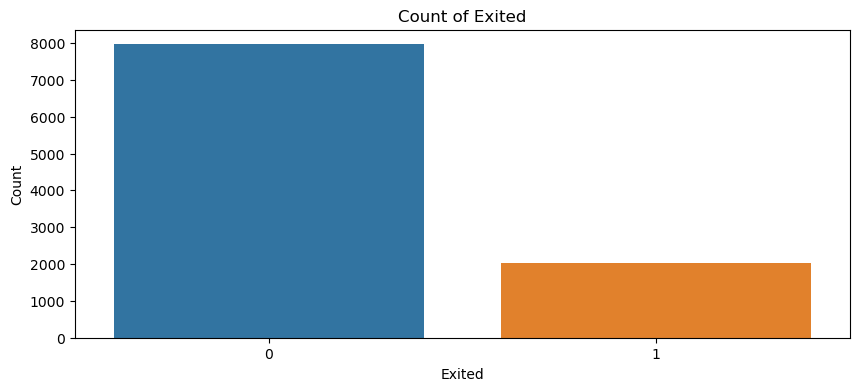

In [10]:
# Univariate analysis for categorical columns
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data[column])
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

#### Bivariate Analysis

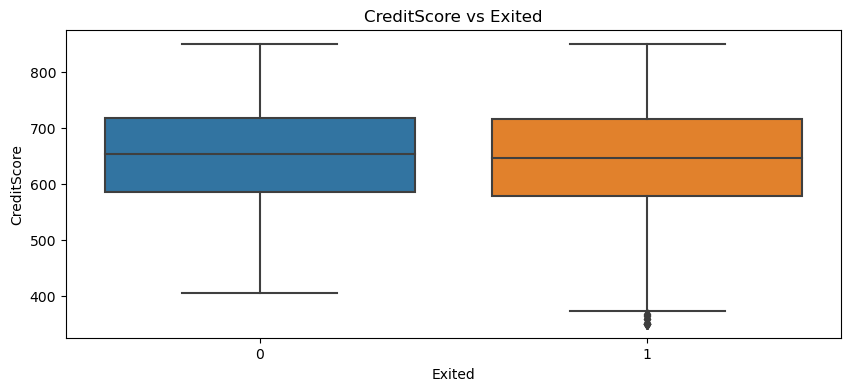

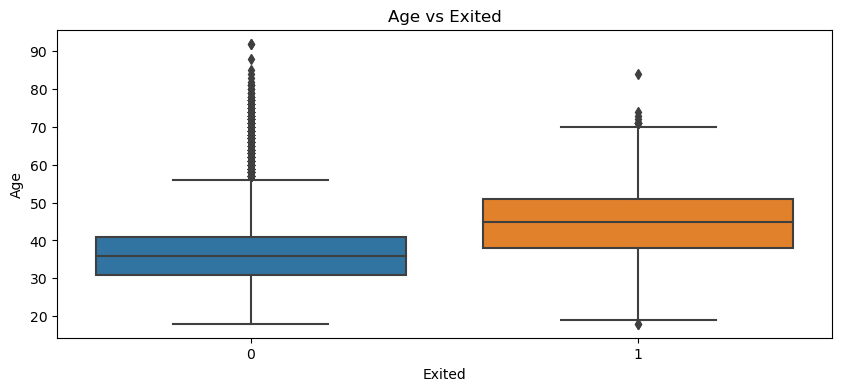

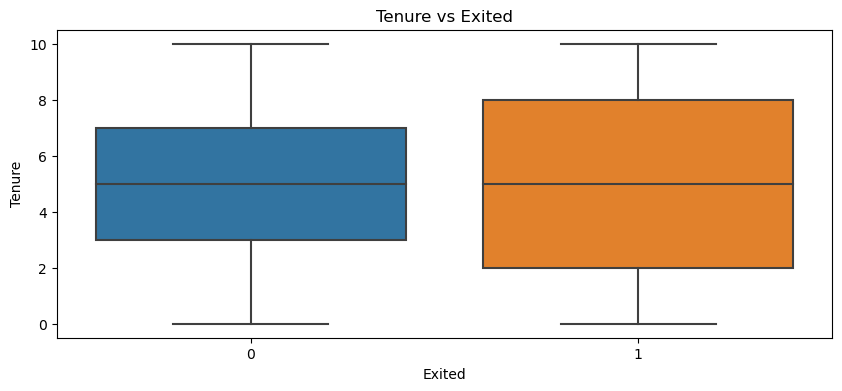

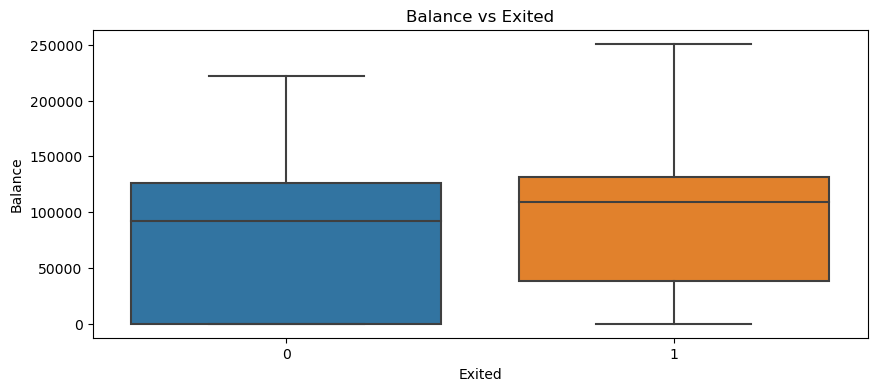

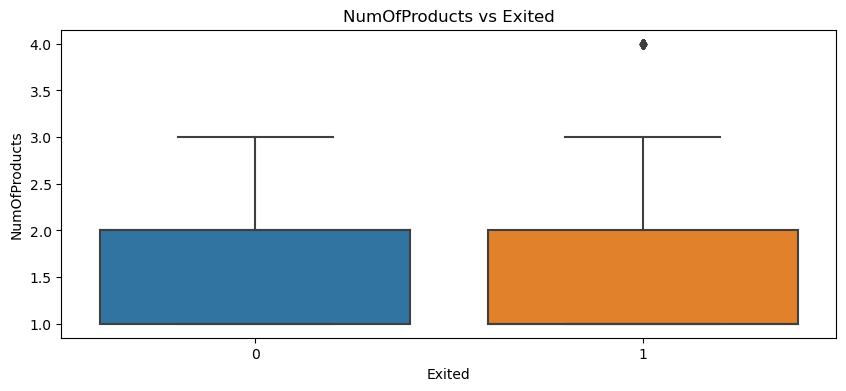

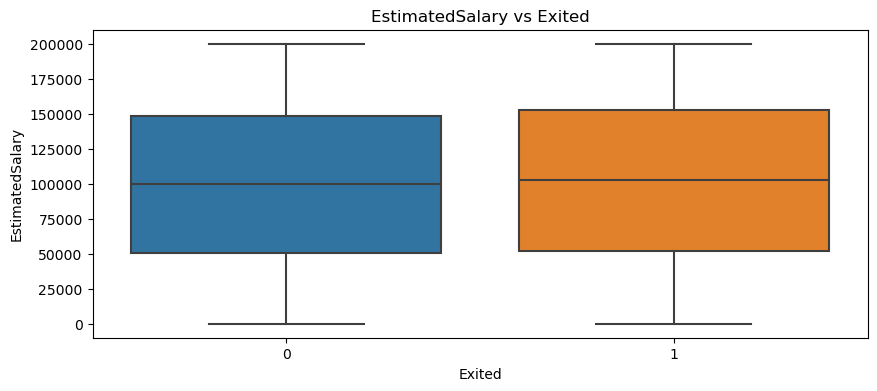

In [11]:
# Bivariate analysis for numerical vs target (Exited)
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Exited', y=column, data=data)
    plt.title(f'{column} vs Exited')
    plt.xlabel('Exited')
    plt.ylabel(column)
    plt.show()

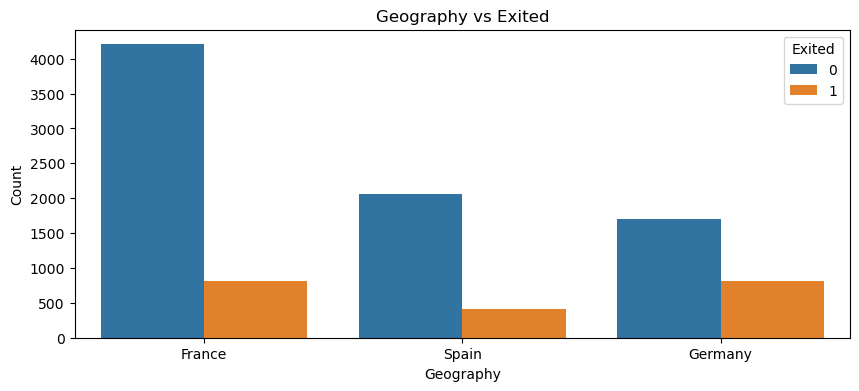

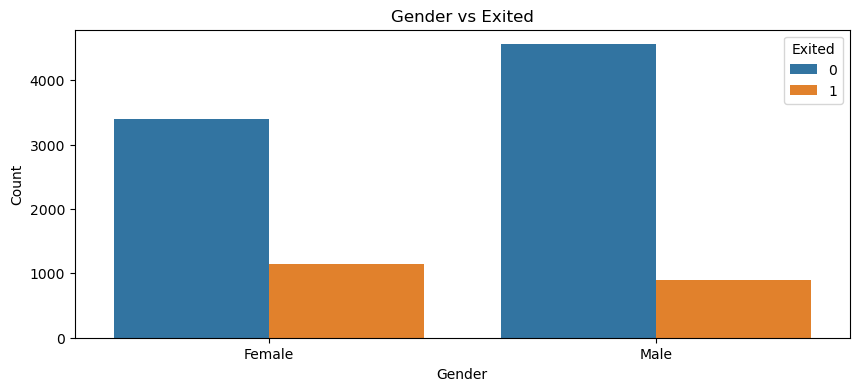

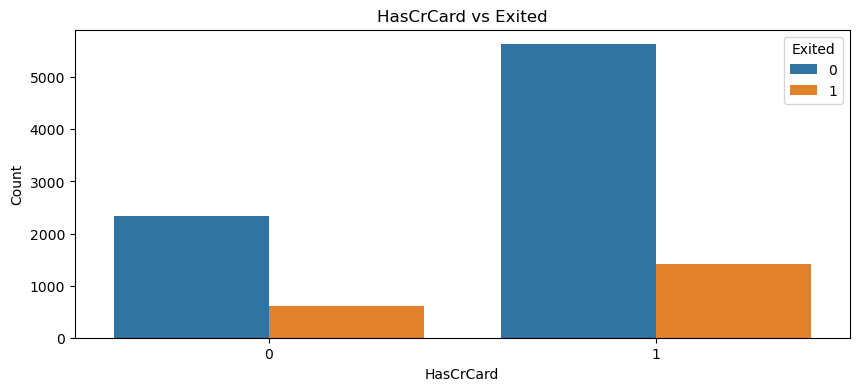

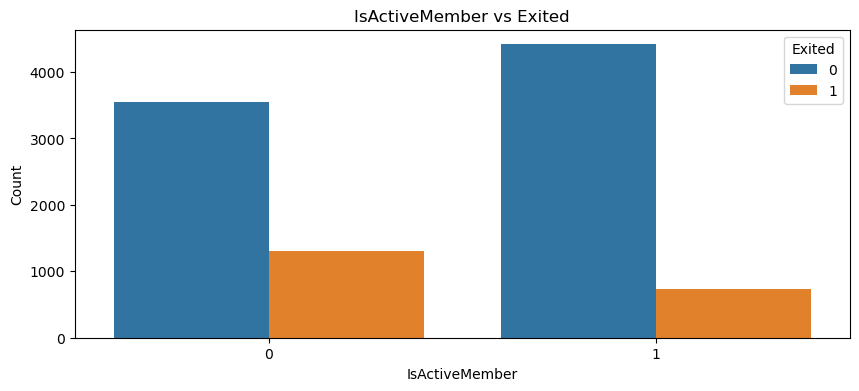

In [12]:
# Bivariate analysis for categorical vs target (Exited)
for column in categorical_columns:
    if column != 'Exited':  # Exclude target variable itself
        plt.figure(figsize=(10, 4))
        sns.countplot(x=column, hue='Exited', data=data)
        plt.title(f'{column} vs Exited')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Exited')
        plt.show()

### Statistical Analysis

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [16]:
# Descriptive statistics for numerical columns
numerical_stats = data.describe()
print(numerical_stats)

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [17]:
# Descriptive statistics for categorical columns
categorical_stats = data.describe(include=['object'])
print(categorical_stats)

       Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457


#### Correlation Analysis: 

In [21]:
df_numeric_features = data.select_dtypes(include=np.number)

In [22]:
corr =  df_numeric_features.corr()

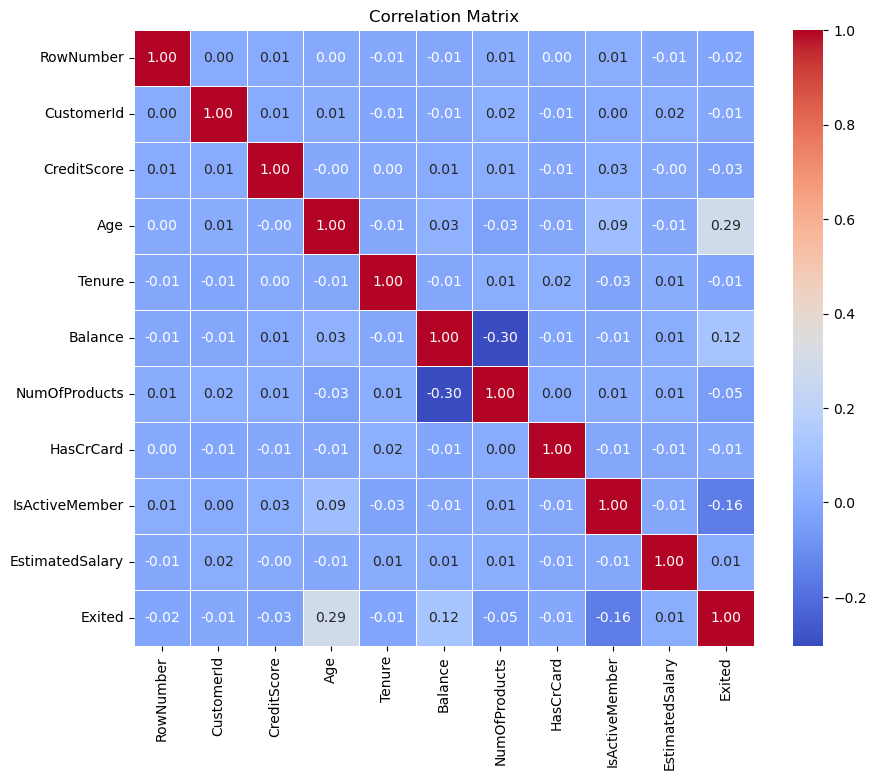

In [23]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Data Pre Processing

In [20]:
# Missing Values

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# No missing values

### Feature Selection 

In [10]:
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [12]:
# Dropping RowNumber, Customer ID and Surname

data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data.shape

(10000, 11)

In [15]:
# Train Test Split

x = data.drop(columns='Exited')
y = data['Exited']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.9,random_state=3,stratify=y)

In [17]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(9000, 10) (9000,) (1000, 10) (1000,)


In [ ]:
# Frequency encoding for Geography
# Dummy Encoding for Gender 

In [21]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [22]:
x_train['Geography'].value_counts()

Geography
France     4522
Germany    2255
Spain      2223
Name: count, dtype: int64

In [20]:
# Frequency encoding for Geography


geo_encoding = x_train['Geography'].value_counts().to_dict()  # doesn't include test dataset 

In [26]:
geo_encoding  # Identify the values and map those values to the strings 

{'France': 4522, 'Germany': 2255, 'Spain': 2223}

In [24]:
x_train['Geography'] = x_train['Geography'].map(geo_encoding)  # Using frequency of train: on both train and test data
x_test['Geography'] = x_test['Geography'].map(geo_encoding)  

In [25]:
x_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6904,744,2255,Male,29,6,123737.04,2,1,0,141558.04
314,744,2223,Male,36,2,153804.44,1,1,1,87213.33


In [27]:
# Dummy Encoding for Gender

x_train = pd.get_dummies(x_train,drop_first=True,dtype=int)
x_test = pd.get_dummies(x_test,drop_first=True,dtype=int)

In [29]:
x_train.shape

(9000, 10)

In [30]:
x_test.shape

(1000, 10)

In [31]:
x_train.head(2)  # 1 - Male, Female- 0

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
6904,744,2255,29,6,123737.04,2,1,0,141558.04,1
314,744,2223,36,2,153804.44,1,1,1,87213.33,1


### Predictive Modeling

In [ ]:
# The below function: it fits as well as validates the model

In [59]:
accu = [] #global variables
recl = []
prec = []
f1 = []
model_name = []
def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model  #creating instance of the model
    m.fit(xtrain,ytrain)  #fitting the model
    pred_h = m.predict(xtest) #calculating hard predictions
    pred_s = m.predict_proba(xtest)[:,1]  #calculating soft predictions
    print('Classification Report:\n',classification_report(ytest,pred_h))
    
    fpr,tpr,thre = roc_curve(ytest,pred_s)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.plot(fpr,tpr)
    plt.show()
    
    resp = input('Do you want to keep this Model? Yes')
    if resp.lower()=='yes':
        model_name.append(str(model))  #Convert model function to string (cuz RF has trees and gives parameters to the fun; default also it gives, just passing it as a name)
        accu.append(accuracy_score(ytest,pred_h))
        recl.append(recall_score(ytest,pred_h))
        prec.append(precision_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        global df_score # can call outside the function
        df_score = pd.DataFrame({'Model':model_name,'Accuracy':accu,'Recall':recl,'Precision':prec,'F1 Score':f1})
        return m

In [74]:
# Two Models 

model_validation(DecisionTreeClassifier(max_depth=4),
                x_train,y_train,x_test,y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



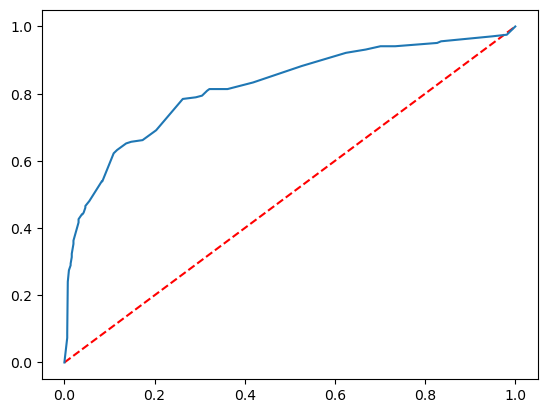

Do you want to keep this Model? Yesyes


DecisionTreeClassifier(max_depth=7)

In [61]:
model_validation(DecisionTreeClassifier(max_depth=7),
                x_train,y_train,x_test,y_test)

In [62]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,DecisionTreeClassifier(max_depth=4),0.852,0.382353,0.780000,0.513158
1,DecisionTreeClassifier(max_depth=7),0.855,0.441176,0.743802,0.553846


### Decision Tree (Model 1)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



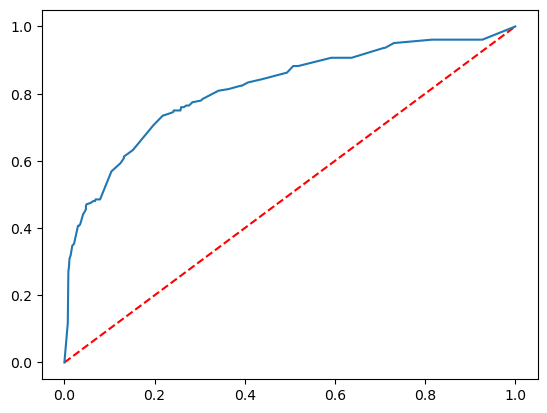

Do you want to keep this Model? Yesyes


In [63]:
dt = model_validation(DecisionTreeClassifier(max_depth=8),x_train,y_train,x_test,y_test)

### Naive Bayes (Model-2)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       796
           1       0.35      0.09      0.14       204

    accuracy                           0.78      1000
   macro avg       0.57      0.52      0.51      1000
weighted avg       0.71      0.78      0.72      1000



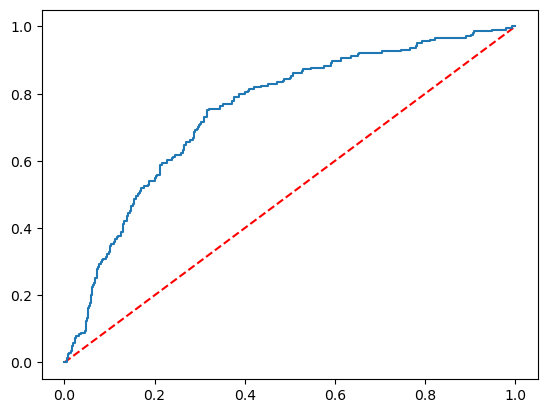

Do you want to keep this Model? Yesyes


In [64]:
nb = model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

#### Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.76      0.44      0.56       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



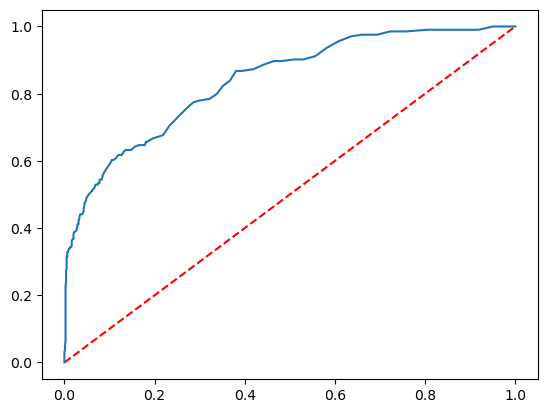

Do you want to keep this Model? Yesyes


In [65]:
rf = model_validation(RandomForestClassifier(n_estimators=150),x_train,y_train,x_test,y_test)

### ADABoost 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.46      0.56       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



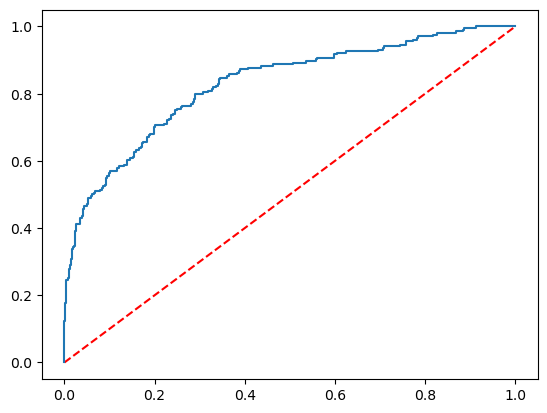

Do you want to keep this Model? Yesyes


In [68]:
ada = model_validation(AdaBoostClassifier(n_estimators=200),x_train,y_train,x_test,y_test)

### Gradient Boost 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.44      0.54       204

    accuracy                           0.85      1000
   macro avg       0.78      0.69      0.72      1000
weighted avg       0.83      0.85      0.83      1000



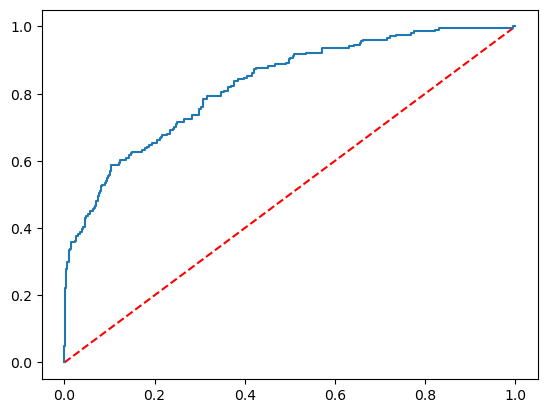

Do you want to keep this Model? Yesyes


In [69]:
gbc = model_validation(GradientBoostingClassifier(n_estimators=150,max_depth=9),x_train,y_train,x_test,y_test)

### XG Boost

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.72      0.48      0.57       204

    accuracy                           0.86      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



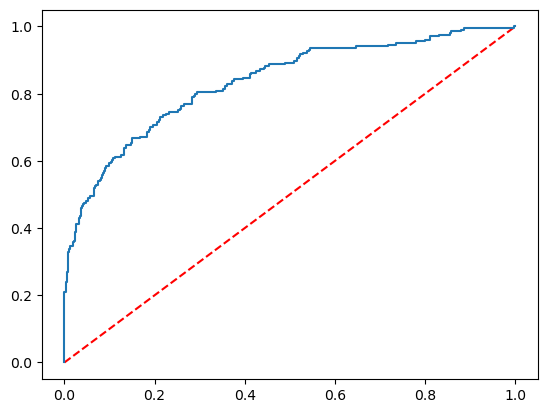

Do you want to keep this Model? Yesyes


In [70]:
xgb = model_validation(XGBClassifier(n_estimators=100,max_depth=7),x_train,y_train,x_test,y_test)

### Voting 

In [71]:
base_models = [('DT',DecisionTreeClassifier(max_depth=8)),
              ('RF',RandomForestClassifier(n_estimators=150,max_depth=13)),
              ('ADABoost',AdaBoostClassifier(n_estimators=200)),
              ('GB',GradientBoostingClassifier(n_estimators=150,max_depth=10))]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.44      0.55       204

    accuracy                           0.86      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.85      0.86      0.84      1000



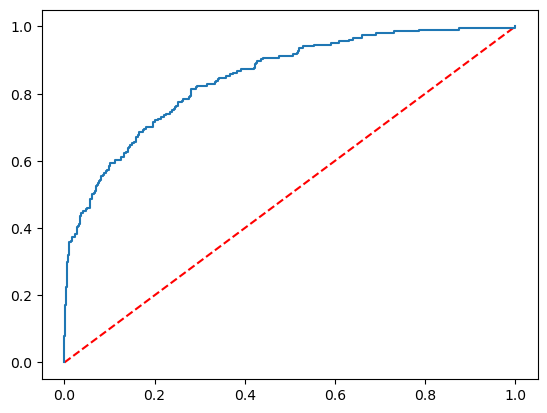

Do you want to keep this Model? Yesyes


In [72]:
voting = model_validation(VotingClassifier(estimators=base_models,voting='soft'),x_train,y_train,x_test,y_test)

### Stacking

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.44      0.54       204

    accuracy                           0.85      1000
   macro avg       0.78      0.69      0.72      1000
weighted avg       0.83      0.85      0.83      1000



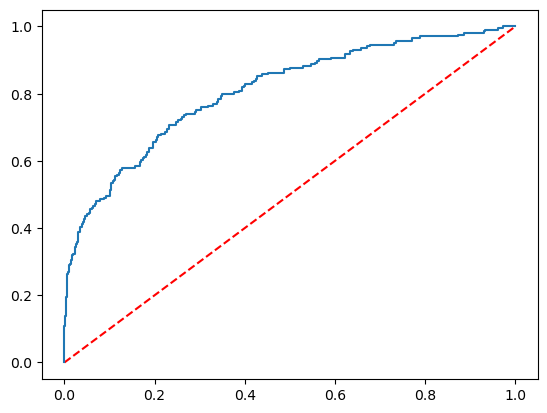

Do you want to keep this Model? Yesyes


In [76]:
stacking = model_validation(StackingClassifier(estimators=base_models,final_estimator=XGBClassifier(n_estimators=150,max_depth=10)),x_train,y_train,x_test,y_test)

### Model Fine Tuning

In [77]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,DecisionTreeClassifier(max_depth=4),0.852,0.382353,0.780000,0.513158
1,DecisionTreeClassifier(max_depth=7),0.855,0.441176,0.743802,0.553846
2,DecisionTreeClassifier(max_depth=8),0.853,0.441176,0.731707,0.550459
3,GaussianNB(),0.780,0.088235,0.346154,0.140625
4,RandomForestClassifier(n_estimators=150),0.858,0.441176,0.762712,0.559006
5,AdaBoostClassifier(n_estimators=200),0.856,0.455882,0.738095,0.563636
6,"GradientBoostingClassifier(max_depth=9, n_esti...",0.846,0.436275,0.695312,0.536145
7,"XGBClassifier(base_score=None, booster=None, c...",0.856,0.475490,0.723881,0.573964
8,"VotingClassifier(estimators=[('DT', DecisionTr...",0.856,0.436275,0.754237,0.552795
9,"StackingClassifier(estimators=[('DT', Decision...",0.846,0.436275,0.695312,0.536145


In [78]:
### Fine Tuning XGBoost 

grid = {'n_estimators':[100,150,200,250,300,350],
       'gamma':[0,1,2,3],
       'max_depth':[7,10,13,16,19]}

In [79]:
gscv_xgb = GridSearchCV(estimator=XGBClassifier(),param_grid=grid,scoring='recall',cv=5,verbose=1)

In [80]:
gscv_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 1, 2, 3],
                         'max_depth': [7, 10, 13, 16, 19],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='recall', verbose=1)

In [81]:
gscv_xgb.best_params_

{'gamma': 0, 'max_depth': 16, 'n_estimators': 350}

In [82]:
gscv_xgb.best_score_

0.5019014011107636

### FINAL MODEL 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       796
           1       0.66      0.45      0.53       204

    accuracy                           0.84      1000
   macro avg       0.76      0.70      0.72      1000
weighted avg       0.83      0.84      0.83      1000



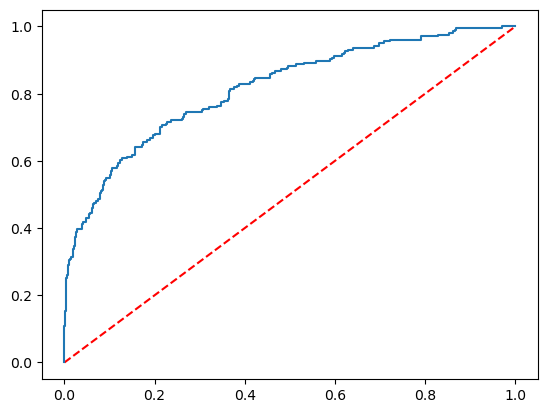

Do you want to keep this Model? Yesyes


In [83]:
final_model = model_validation(XGBClassifier(**gscv_xgb.best_params_),x_train,y_train,x_test,y_test)

### Prediction

In [84]:
x_test.head(1)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
5371,712,4522,33,3,153819.58,1,1,0,79176.09,1


In [85]:
geo_encoding

{'France': 4522, 'Germany': 2255, 'Spain': 2223}

In [89]:
final_model.predict([[675,4522,35,4,120000,2,1,0,60000,0]])[0]

0

In [ ]:
# 0 - means the cx didn't exit (not at risk)

In [90]:
final_model.predict([[675,4522,35,4,120000,2,1,0,60000,1]])[0]

0

In [ ]:
# 0 - means this cx didn't exit (not at risk)

### Saving the Fitted Model 

In [92]:
import pickle

In [93]:
with open('final_model.pkl','wb') as file: #Writable mode - write binary(will create and write in that file)
    pickle.dump(final_model,file)

In [ ]:
#Read mode - read only
#Write mode - write & create
#Append - not allow to create (whatever will be written)